<a href="https://colab.research.google.com/github/hydrationn/Machine-DeepLearning/blob/main/DeepLearning/assignment/%EA%B3%BC%EC%A0%9C2_202101109_%E1%84%87%E1%85%A1%E1%86%A8%E1%84%89%E1%85%AE%E1%84%92%E1%85%AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Model 1. 사용자 정의 MLP 모델 변경

# activation function: ReLU -> LeakyReLU 사용
# hidden layer 수 및 node 수 변경

In [ ]:
# import package

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.utils.data as data_utils
import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
# GPU/CPU setting

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

cpu


In [ ]:
# import dataset

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform = transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform = transforms.ToTensor(), download=True)

In [ ]:
# Batch generation

batch_size = 100

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([1, 28, 28])
tensor(0)


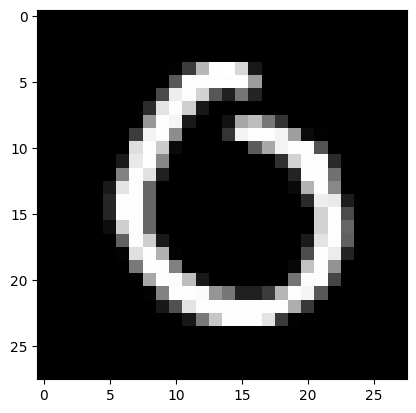

In [ ]:
# Batch generation

for i, data in enumerate(train_loader):
  x,y = data
  print(y.shape)
  print(x.shape)
  print(x[0].shape)
  print(y[0])
  plt.imshow(x[0][0].reshape(28,28), cmap='gray')
  break

In [ ]:
# Model

class CustomMLPModel(torch.nn.Module):
    def __init__(self):
        super(CustomMLPModel, self).__init__()
        self.fc1 = torch.nn.Linear(784, 512)  # 입력 노드 수 변경: 256 -> 512
        self.fc2 = torch.nn.Linear(512, 128)  # 새로운 hidden layer 추가
        self.fc3 = torch.nn.Linear(128, 10)
        self.leaky_relu = torch.nn.LeakyReLU()  # activation function 변경

    def forward(self, x):
        x = self.leaky_relu(self.fc1(x))
        x = self.leaky_relu(self.fc2(x))
        return self.fc3(x)

In [ ]:
# Parameter

# 파라미터 정의
input_size = 784 #28*28
num_classes = 10
num_epochs = 5
learning_rate = 0.1

In [ ]:
# Model

# 모델 정의
model = CustomMLPModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# Train

# Model Train
loss_list = []
for epoch_num in range(num_epochs):
  average_cost = 0

  for batch_idx, (x_data, y_label) in enumerate(train_loader):
    num_of_mini_batch = len(train_loader)
    x_data = x_data.reshape(-1, 28*28)
    input_image = x_data.to(device)
    label = y_label.to(device)
    optimizer.zero_grad()
    y_predict = model(input_image)
    loss = criterion(y_predict, label)
    loss.backward()
    optimizer.step()

    average_cost = average_cost + (loss.item()/num_of_mini_batch)
    loss_list.append(loss)

  print("Epoch {} Loss {:.5f}".format((epoch_num+1), average_cost))

Epoch 1 Loss 0.58185
Epoch 2 Loss 0.22452
Epoch 3 Loss 0.15856
Epoch 4 Loss 0.12054
Epoch 5 Loss 0.09598


In [ ]:
# Validation

with torch.no_grad():
  num_total_data = 0
  correct = 0
  for batch_idx, (images, labels) in enumerate(test_loader):

    images = images.reshape(-1, 28*28)
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    outputs_softmax = F.softmax(outputs, dim=1)
    predicted = torch.argmax(outputs_softmax, dim=1)

    num_total_data += len(images)
    answer = sum(labels==predicted).item()
    correct += answer

print("Model accuracy {:.5f}%".format((correct/num_total_data)*100))

Model accuracy 96.96000%


In [ ]:
# Model 2. Sequential API 사용

# activaion function: Sigmoid 사용
# hidden layer 수 및 node 수 변경

In [ ]:
# Model

model = torch.nn.Sequential(
    nn.Linear(784, 512),
    nn.Sigmoid(),
    nn.Linear(512, 128),
    nn.Sigmoid(),
    nn.Linear(128, 10)
).to(device)

In [ ]:
# Parameter

epoch = 5
learning_rate = 0.01

In [ ]:
# Model

# 모델 정의
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# Train

# Model Train
loss_list = []
for epoch_num in range(num_epochs):
  average_cost = 0

  for batch_idx, (x_data, y_label) in enumerate(train_loader):
    num_of_mini_batch = len(train_loader)
    x_data = x_data.reshape(-1, 28*28)
    input_image = x_data.to(device)
    label = y_label.to(device)
    optimizer.zero_grad()
    y_predict = model(input_image)
    loss = criterion(y_predict, label)
    loss.backward()
    optimizer.step()

    average_cost = average_cost + (loss.item()/num_of_mini_batch)
    loss_list.append(loss)

  print("Epoch {} Loss {:.5f}".format((epoch_num+1), average_cost))

Epoch 1 Loss 0.36631
Epoch 2 Loss 0.34690
Epoch 3 Loss 0.33268
Epoch 4 Loss 0.31977
Epoch 5 Loss 0.30892


In [ ]:
# Validation

with torch.no_grad():
  num_total_data = 0
  correct = 0
  for batch_idx, (images, labels) in enumerate(test_loader):

    images = images.reshape(-1, 28*28)
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    outputs_softmax = F.softmax(outputs, dim=1)
    predicted = torch.argmax(outputs_softmax, dim=1)

    num_total_data += len(images)
    answer = sum(labels==predicted).item()
    correct += answer

print("Model accuracy {:.5f}%".format((correct/num_total_data)*100))

Model accuracy 89.52000%
